# Understanding Graphs with `NetworkX`

- This Notebook will cover 'NetworkX' library.
- We will cover basics of graphs in this tutorial: reading, writing & manipulating graphs along with various graph attributes using NetworkX. 

## NetworkX

- NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.

- With NetworkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

- Library documentation: https://networkx.org/

- You can Install NetworkX in your local environment following this link:
    - https://networkx.org/documentation/stable/install.html


In [49]:
# Importing Required Libraries 

import networkx as nx

import numpy as np

## Graph Creation

In [50]:
# intialize graph 

G = nx.Graph()

print(type(G))

<class 'networkx.classes.graph.Graph'>


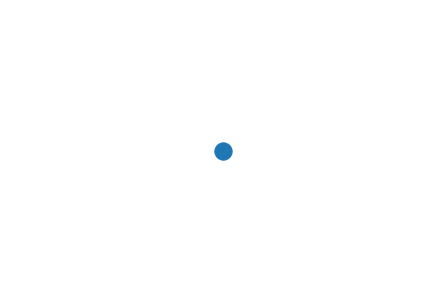

In [51]:
# adding nodes

G.add_node(1)

nx.draw(G)

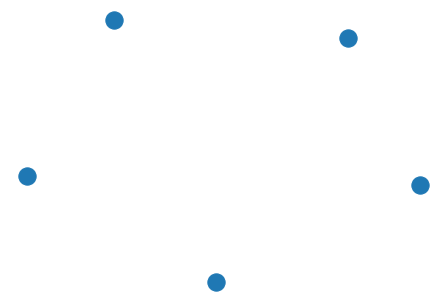

In [52]:
G.add_nodes_from([2,3,4,5])
nx.draw(G)

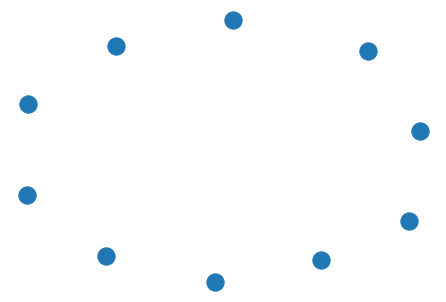

In [53]:
# adding many nodes at once 
H = nx.path_graph(10)

G.add_nodes_from(H)
nx.draw(G)

## Edges

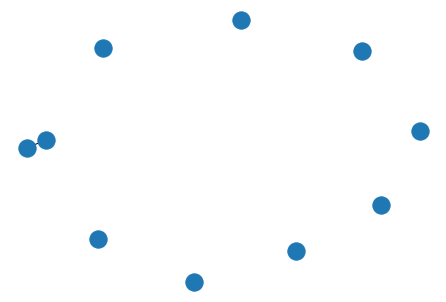

In [54]:
# In graph we can add edges as well

G.add_edge(1,2)
nx.draw(G)

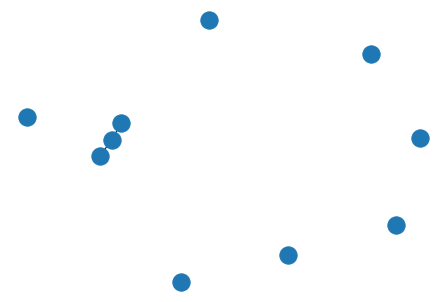

In [55]:
# Edges can also be added using list of edges

G.add_edges_from([(1,2),(1,3)])
nx.draw(G)

In [56]:
G.clear()

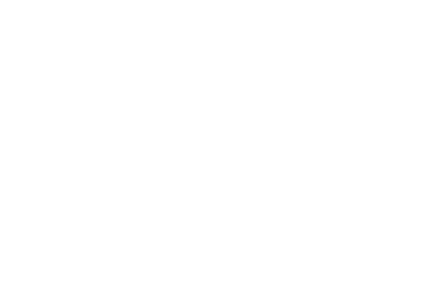

In [57]:
# After clearing the graph

nx.draw(G)

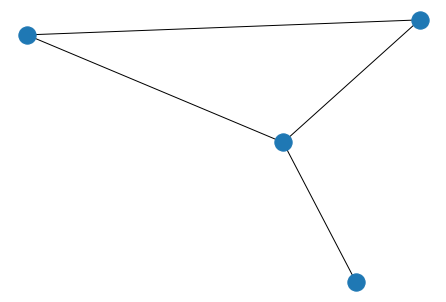

In [58]:
##  adding multiple edges at a time
E = [(1, 2), (2, 3), (1, 4), (4, 2)]
G.add_edges_from(E)
nx.draw(G)

In [59]:
# to print total number of nodes in the graph

G.number_of_nodes()

4

In [60]:
# to print total number of edges in the graph

G.number_of_edges()

4

In [61]:
print('Nodes = ',G.nodes)
print('Edges = ',G.edges)

Nodes =  [1, 2, 3, 4]
Edges =  [(1, 2), (1, 4), (2, 3), (2, 4)]


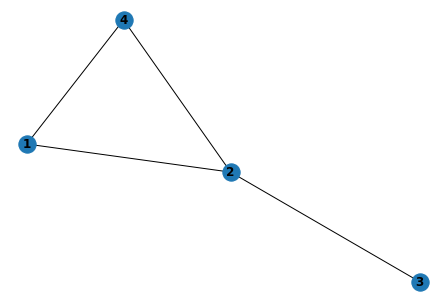

In [62]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True, font_weight='bold')

In [63]:
# we can also compute the degree of the nodes and neighbors as well

for v in G.nodes:
    print(f" Node {v} degree is {G.degree(v)}")


 Node 1 degree is 2
 Node 2 degree is 3
 Node 3 degree is 1
 Node 4 degree is 2


In [64]:
# to print neighbors

print(f"Neighbors for nodes: { {v: list(G.neighbors(v)) for v in G.nodes} }")

Neighbors for nodes: {1: [2, 4], 2: [1, 3, 4], 3: [2], 4: [1, 2]}


In [65]:
## Function to draw graph

def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=10)
    
    
    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=10)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

## Different types of graphs

Here we will explore different types of graphs



### 1. Directed Graph

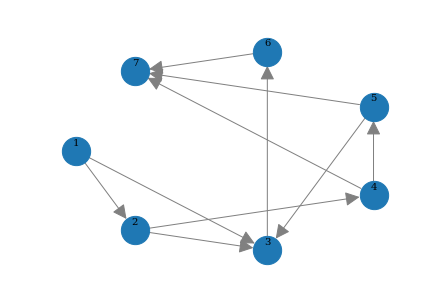

In [66]:
G_directed = nx.DiGraph() # for directed graphs

V = [1,2,3,4,5,6,7]
E = [(1,2),(1,3),(2,4),(2,3),(3,6),(4,5),(4,7),(5,7),(5,3),(6,7)]

G_directed.add_nodes_from(V)
G_directed.add_edges_from(E)

draw_graph(G_directed, pos_nodes=nx.shell_layout(G_directed),node_size=800)

In [67]:
# printing different properties of Directed graph

print(f"Indegree for nodes: { {v: G_directed.in_degree(v) for v in G_directed.nodes} }")
print(f"Outdegree for nodes: { {v: G_directed.out_degree(v) for v in G_directed.nodes} }")

Indegree for nodes: {1: 0, 2: 1, 3: 3, 4: 1, 5: 1, 6: 1, 7: 3}
Outdegree for nodes: {1: 2, 2: 2, 3: 1, 4: 2, 5: 2, 6: 1, 7: 0}


### 2. Weighted graph

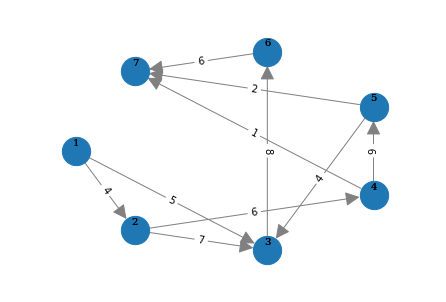

In [68]:
G_weighted = nx.DiGraph() # for directed weighted graph

V = [1,2,3,4,5,6,7]
E = [(1,2,4),(1,3,5),(2,4,6),(2,3,7),(3,6,8),(4,5,9),(4,7,1),(5,7,2),(5,3,4),(6,7,6)]

G_weighted.add_nodes_from(V)

G_weighted.add_weighted_edges_from(E)


draw_graph(G_weighted, pos_nodes=nx.shell_layout(G_weighted), node_size=800, plot_weight=True)


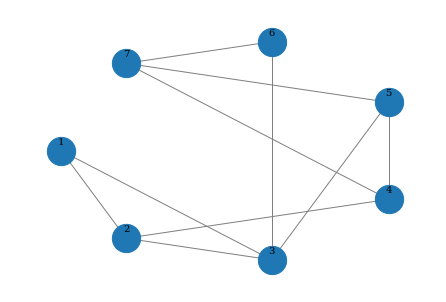

In [69]:
# Creating new undirected graph

V = [1,2,3,4,5,6,7]
E = [(1,2),(1,3),(2,4),(2,3),(3,6),(4,5),(4,7),(5,7),(5,3),(6,7)]

G = nx.Graph()

G.add_nodes_from(V)
G.add_edges_from(E)

draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=800)

## Computing Adjacency matrix

In [70]:
# Adjacency matrix can be printed as pandas or numpy both formats

nx.to_pandas_adjacency(G) #adjacency matrix as pd DataFrame

,1,2,3,4,5,6,7
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [71]:
nx.to_numpy_matrix(G) #adjacency matrix as numpy matrix

matrix([[0., 1., 1., 0., 0., 0., 0.],
        [1., 0., 1., 1., 0., 0., 0.],
        [1., 1., 0., 0., 1., 1., 0.],
        [0., 1., 0., 0., 1., 0., 1.],
        [0., 0., 1., 1., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 1.],
        [0., 0., 0., 1., 1., 1., 0.]])

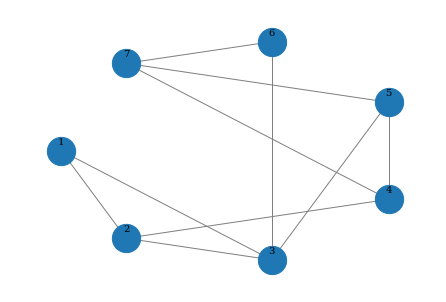

In [73]:
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=800)

In [74]:
# all possible paths

paths = nx.all_simple_paths(G,source=1,target=7)
list(paths)

[[1, 2, 4, 5, 7],
 [1, 2, 4, 5, 3, 6, 7],
 [1, 2, 4, 7],
 [1, 2, 3, 6, 7],
 [1, 2, 3, 5, 4, 7],
 [1, 2, 3, 5, 7],
 [1, 3, 2, 4, 5, 7],
 [1, 3, 2, 4, 7],
 [1, 3, 6, 7],
 [1, 3, 5, 4, 7],
 [1, 3, 5, 7]]

In [75]:
# In order to compute shortest path between two nodes in this non weighted graph 'G'.

path = nx.shortest_path(G,source=1,target=7)
print(path)

[1, 2, 4, 7]


In [76]:
## To compute degree centrality

nx.degree_centrality(G)

{1: 0.3333333333333333,
 2: 0.5,
 3: 0.6666666666666666,
 4: 0.5,
 5: 0.5,
 6: 0.3333333333333333,
 7: 0.5}

In [77]:
## Eigenvector centrality

nx.eigenvector_centrality(G)

{1: 0.2886904046303359,
 2: 0.38908517604040044,
 3: 0.4652766421944845,
 4: 0.3975088638733298,
 5: 0.41675177305542727,
 6: 0.2824337293934894,
 7: 0.37057262930009627}

In [78]:
### Betweenness centrality

nx.betweenness_centrality(G)

{1: 0.0,
 2: 0.12222222222222222,
 3: 0.31111111111111106,
 4: 0.1222222222222222,
 5: 0.08888888888888888,
 6: 0.05555555555555555,
 7: 0.1}

### If you want to draw a complete graph

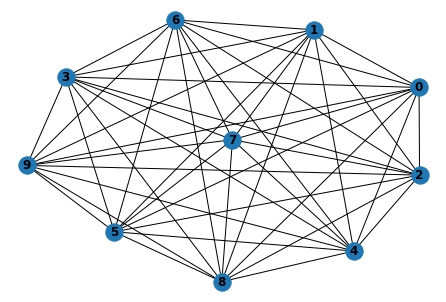

In [79]:
complete_G = nx.complete_graph(n=10)

nx.draw(complete_G, with_labels=True, font_weight='bold')

## Example Graph using NetworkX:

**Karate Club Graph:**

Zachary's karate club is a social network of a university karate club, described in the paper "An Information Flow Model for Conflict and Fission in Small Groups" by Wayne W. Zachary.


Ref: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm#zachary

In [80]:
kk_G = nx.karate_club_graph()

kk_G.nodes()


NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [81]:
kk_G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

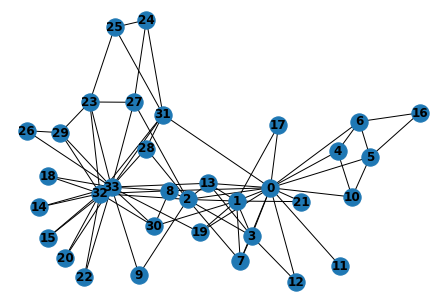

In [84]:


nx.draw(kk_G, with_labels=True, font_weight='bold')

In [85]:
## eigenvector centrality of karate club graph 


kkg_ec_values = nx.eigenvector_centrality(kk_G)
kkg_ec_values

{0: 0.3554834941851943,
 1: 0.2659538704545025,
 2: 0.31718938996844476,
 3: 0.2111740783205706,
 4: 0.07596645881657382,
 5: 0.07948057788594247,
 6: 0.07948057788594247,
 7: 0.17095511498035434,
 8: 0.2274050914716605,
 9: 0.10267519030637758,
 10: 0.07596645881657381,
 11: 0.05285416945233648,
 12: 0.08425192086558088,
 13: 0.22646969838808148,
 14: 0.10140627846270832,
 15: 0.10140627846270832,
 16: 0.023634794260596875,
 17: 0.09239675666845953,
 18: 0.10140627846270832,
 19: 0.14791134007618667,
 20: 0.10140627846270832,
 21: 0.09239675666845953,
 22: 0.10140627846270832,
 23: 0.15012328691726787,
 24: 0.05705373563802805,
 25: 0.05920820250279008,
 26: 0.07558192219009324,
 27: 0.13347932684333308,
 28: 0.13107925627221215,
 29: 0.13496528673866567,
 30: 0.17476027834493085,
 31: 0.19103626979791702,
 32: 0.3086510477336959,
 33: 0.373371213013235}

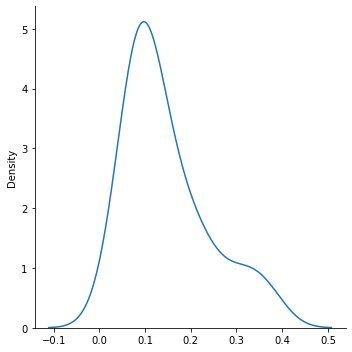

In [86]:
import seaborn as sns

sns.displot(np.array(list(kkg_ec_values.values())), kind="kde");

In [87]:
kk_d = [kk_G.degree(i) for i in kk_G.nodes()]

print('Average degree of kk_graph: ',np.mean(np.array(kk_d)))

Average degree of kk_graph:  4.588235294117647


In [88]:
kk_d

[16,
 9,
 10,
 6,
 3,
 4,
 4,
 4,
 5,
 2,
 3,
 1,
 2,
 5,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 5,
 3,
 3,
 2,
 4,
 3,
 4,
 4,
 6,
 12,
 17]

Text(0.5, 1.0, 'Karate Club: Node Degree')

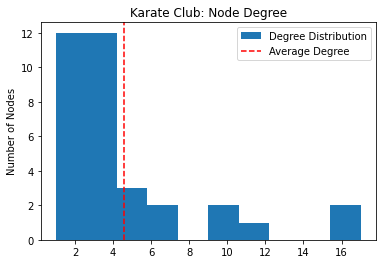

In [89]:
# We now plot the degree distribution to get a better insight

plt.hist(kk_d,label='Degree Distribution')
plt.axvline(np.mean(np.array(kk_d)),color='r',linestyle='dashed',label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Karate Club: Node Degree')